#### Hyperparameters
* Configuration of model init values
* Choice of hyperparameters 

* Choose a class of model
* Choose model hyperparameters
* Fit the model to training data
* Use the model to predict labels for new data

### Model Validation

In [71]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
iris.target_names
X

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [72]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1) # n_neighbors are hyperparameters

In [73]:
model.fit(X, y) # Training the model
y_model = model.predict(X) 

In [74]:
from sklearn.metrics import accuracy_score #Finding accuracy of classification algo
# Evaluating classifiers
accuracy_score(y, y_model)
y_model
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

### Doing it right way

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X1, X2, y1, y2 = train_test_split(X,y, random_state = 0, train_size=0.75)

In [77]:
X1.shape

(112, 4)

In [78]:
X2.shape

(38, 4)

In [79]:
model.fit(X1, y1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [80]:
y2_predict = model.predict(X2)

In [20]:
accuracy_score(y2,y2_predict)

0.97368421052631582

In [82]:
model.predict([[ 1,  1,  1,  1]])

array([0])

### Model validation via cross-validation

In [21]:
from sklearn.cross_validation import cross_val_score

In [24]:
import numpy as np
np.mean(cross_val_score(model, X,y, cv=5))

0.95999999999999996

In [25]:
cross_val_score(model, X,y, cv=5)

array([ 0.96666667,  0.96666667,  0.93333333,  0.93333333,  1.        ])

### validation curves in scikit-learn

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [27]:
def Polynomialregression(degree = 2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [84]:
import numpy as np

def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)
X
y

array([  7.24998644,   7.70041705,  -0.12288892,   3.83970623,
         1.50418461,   1.31600899,   1.88404109,   5.0456151 ,
         5.42819209,   6.59281674,   5.70193919,   8.23148858,
         1.8305394 ,   9.086429  ,   1.73425177,   8.92229631,
         6.16043712,   6.68597765,   0.8992155 ,   4.51082693,
         8.70162943,   8.39917725,   5.14639037,  10.37406543,
         8.96816213,   9.50648826,   0.9746409 ,  -0.20201375,
         1.09605993,   8.50272859,   0.67301646,   6.98083184,
         9.856233  ,   8.32873282,   8.55755817,   5.87386864,
         7.49515774,   9.997533  ,   0.54626444,   8.1929663 ])

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting

In [85]:
X_test = np.linspace(-0.1, 1.1, 500)[:,None]
X_test

array([[ -1.00000000e-01],
       [ -9.75951904e-02],
       [ -9.51903808e-02],
       [ -9.27855711e-02],
       [ -9.03807615e-02],
       [ -8.79759519e-02],
       [ -8.55711423e-02],
       [ -8.31663327e-02],
       [ -8.07615230e-02],
       [ -7.83567134e-02],
       [ -7.59519038e-02],
       [ -7.35470942e-02],
       [ -7.11422846e-02],
       [ -6.87374749e-02],
       [ -6.63326653e-02],
       [ -6.39278557e-02],
       [ -6.15230461e-02],
       [ -5.91182365e-02],
       [ -5.67134269e-02],
       [ -5.43086172e-02],
       [ -5.19038076e-02],
       [ -4.94989980e-02],
       [ -4.70941884e-02],
       [ -4.46893788e-02],
       [ -4.22845691e-02],
       [ -3.98797595e-02],
       [ -3.74749499e-02],
       [ -3.50701403e-02],
       [ -3.26653307e-02],
       [ -3.02605210e-02],
       [ -2.78557114e-02],
       [ -2.54509018e-02],
       [ -2.30460922e-02],
       [ -2.06412826e-02],
       [ -1.82364729e-02],
       [ -1.58316633e-02],
       [ -1.34268537e-02],
 

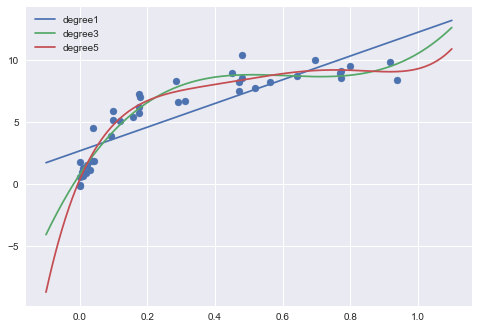

In [87]:
plt.scatter(X.ravel(),y)

axis = plt.axis()
for degree in [1,3,5]:
    y_predict = Polynomialregression(degree).fit(X,y).predict(X_test)
    plt.plot(X_test.ravel(), y_predict, label='degree{0}'.format(degree))
plt.legend()


In [97]:
from sklearn.learning_curve import validation_curve
degree = np.arange(0, 40)
train_score, val_score = validation_curve(Polynomialregression(), X, y,
                                           'polynomialfeatures__degree',degree, cv=7)
#train_score
val_score

array([[ -6.02466431e-01,  -2.04614785e-03,  -5.14137165e-03,
         -8.44803581e-02,  -4.34209330e-02,  -2.19189277e-01,
         -9.45653840e-02],
       [  5.92416799e-01,   5.29559153e-01,   7.80177836e-01,
          4.90099122e-01,   7.65084790e-01,   5.23537792e-01,
          7.97400923e-01],
       [  8.21356267e-01,   8.91899565e-01,   9.63735832e-01,
          8.12954575e-01,   9.34237748e-01,   8.07794396e-01,
          8.03377916e-01],
       [  9.22981319e-01,   8.39169589e-01,   9.25097408e-01,
          7.18687501e-01,   9.67829358e-01,   9.54962840e-01,
          8.69251017e-01],
       [  9.54819134e-01,   7.91223630e-01,   9.15321765e-01,
          7.95571682e-01,   9.66332483e-01,   9.39546731e-01,
          9.18081789e-01],
       [  9.45669360e-01,   8.06116964e-01,   9.17385973e-01,
          7.95498157e-01,   9.72705217e-01,   9.17507421e-01,
          9.22752226e-01],
       [  9.38122499e-01,   8.16336020e-01,   9.11370295e-01,
          7.19190700e-01,   9.64

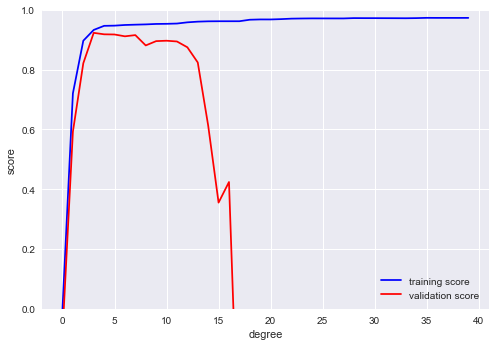

In [98]:
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');
plt.legend(loc='best')

In [102]:
np.median(train_score,1)

array([ 0.        ,  0.72060505,  0.8966661 ,  0.93273606,  0.94641559,
        0.94706837,  0.94928043,  0.95034312,  0.95126473,  0.9527462 ,
        0.95316414,  0.95410179,  0.95812976,  0.9604493 ,  0.96155007,
        0.9618062 ,  0.96182216,  0.96184623,  0.96687145,  0.9678368 ,
        0.96778453,  0.96888191,  0.970485  ,  0.97100495,  0.97131671,
        0.97125767,  0.97121672,  0.97119128,  0.97230487,  0.97217105,
        0.97214214,  0.97203387,  0.97194456,  0.9718033 ,  0.97226741,
        0.97317902,  0.97301882,  0.97302668,  0.97297906,  0.97306376])

In [62]:
train_score.shape

(21, 7)

In [100]:
np.argmax(np.median(val_score, 1))

3

In [101]:
help(np.median)

Help on function median in module numpy.lib.function_base:

median(a, axis=None, out=None, overwrite_input=False, keepdims=False)
    Compute the median along the specified axis.
    
    Returns the median of the array elements.
    
    Parameters
    ----------
    a : array_like
        Input array or object that can be converted to an array.
    axis : {int, sequence of int, None}, optional
        Axis or axes along which the medians are computed. The default
        is to compute the median along a flattened version of the array.
        A sequence of axes is supported since version 1.9.0.
    out : ndarray, optional
        Alternative output array in which to place the result. It must
        have the same shape and buffer length as the expected output,
        but the type (of the output) will be cast if necessary.
    overwrite_input : bool, optional
       If True, then allow use of memory of input array `a` for
       calculations. The input array will be modified by the c

In [103]:
train_score

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.72060505,  0.73235327,  0.71615237,  0.75517775,  0.6979951 ,
         0.74351307,  0.71104367],
       [ 0.8966661 ,  0.89427274,  0.88460403,  0.90482859,  0.87685741,
         0.90106431,  0.90420325],
       [ 0.92830604,  0.93586649,  0.93273606,  0.95501615,  0.91919623,
         0.92673491,  0.9402878 ],
       [ 0.9386132 ,  0.94947024,  0.94775706,  0.9632512 ,  0.93425141,
         0.94148127,  0.94641559],
       [ 0.94121068,  0.94988755,  0.94891078,  0.9637873 ,  0.93481636,
         0.94464031,  0.94706837],
       [ 0.94280027,  0.95011515,  0.95028793,  0.96555698,  0.93622172,
         0.94504929,  0.94928043],
       [ 0.94465044,  0.95166164,  0.95034312,  0.96584535,  0.93731514,
         0.94571392,  0.95274503],
       [ 0.94465097,  0.95169173,  0.95126473,  0.96709791,  0.93735454,
         0.9484231 ,  0.95274521],
       [ 0.94935834,  0.9537